 # Airbnb case

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling


In [2]:
df=pd.read_csv('../data/listings.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9784567,nice Room in Amsterdam,27280608,Petra,NaN,Bijlmer-Oost,52.323369,4.977730,Private room,95,1,5,2016-06-27,0.81,3,365
1,13163805,Best cost benefit room near a metro station,35491461,Phillip,NaN,Bijlmer-Oost,52.315635,4.978166,Private room,60,1,4,2016-06-27,4.00,1,77
2,3719167,Nice room in A´dam SE near nature & heart centre,18991270,Maria,NaN,Bijlmer-Oost,52.316711,4.986618,Private room,45,5,11,2016-01-02,0.48,1,23
3,13188367,Private room 15min metro ride from city center,73797940,Diana,NaN,Bijlmer-Oost,52.321204,4.976630,Private room,35,1,2,2016-05-31,1.62,1,10
4,4831606,Room in Amsterdam in a new house!! Free Bicycle,24314617,Jorim,NaN,Bijlmer-Oost,52.327270,4.967352,Private room,39,14,12,2016-03-22,0.65,1,338


In [3]:
df['last_review']=pd.to_datetime(df['last_review'], yearfirst=True)

In [4]:
df.drop(axis=1, columns=['id','name','host_id','host_name','neighbourhood_group'], inplace=True)

In [5]:
df['months_exist']=df['reviews_per_month']*df['number_of_reviews']
df.head(20)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,months_exist
0,Bijlmer-Oost,52.323369,4.977730,Private room,95,1,5,2016-06-27,0.81,3,365,4.05
1,Bijlmer-Oost,52.315635,4.978166,Private room,60,1,4,2016-06-27,4.00,1,77,16.00
2,Bijlmer-Oost,52.316711,4.986618,Private room,45,5,11,2016-01-02,0.48,1,23,5.28
3,Bijlmer-Oost,52.321204,4.976630,Private room,35,1,2,2016-05-31,1.62,1,10,3.24
4,Bijlmer-Oost,52.327270,4.967352,Private room,39,14,12,2016-03-22,0.65,1,338,7.80
5,Bijlmer-Oost,52.314587,4.975385,Entire home/apt,80,2,0,NaT,NaN,1,9,NaN
6,Bijlmer-Oost,52.326981,4.982949,Entire home/apt,191,2,24,2016-06-26,0.51,1,346,12.24
7,Bijlmer-Oost,52.314588,4.982022,Entire home/apt,129,2,1,2016-05-06,0.50,1,41,0.50
8,Bijlmer-Oost,52.318814,4.980409,Entire home/apt,120,2,1,2016-06-27,1.00,1,39,1.00
9,Bijlmer-Oost,52.314435,4.982351,Entire home/apt,111,1,1,2016-05-13,0.57,1,0,0.57


In [9]:
df['months_exist'].describe()

count    11386.000000
mean        51.151855
std        164.230373
min          0.020000
25%          1.650000
50%          7.600000
75%         30.240000
max       3349.560000
Name: months_exist, dtype: float64

/home/ant_on_su/miniconda3/envs/case/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


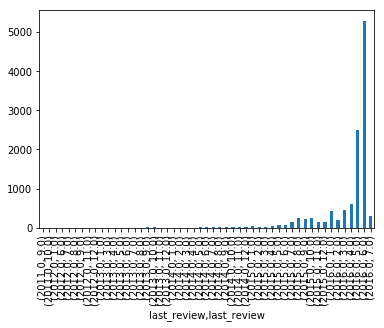

In [35]:
import matplotlib.pyplot as plt
df['last_review'].groupby(by=(df.last_review.dt.year, df.last_review.dt.month)).count().plot(kind='bar')

/home/ant_on_su/miniconda3/envs/case/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ant_on_su/miniconda3/envs/case/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


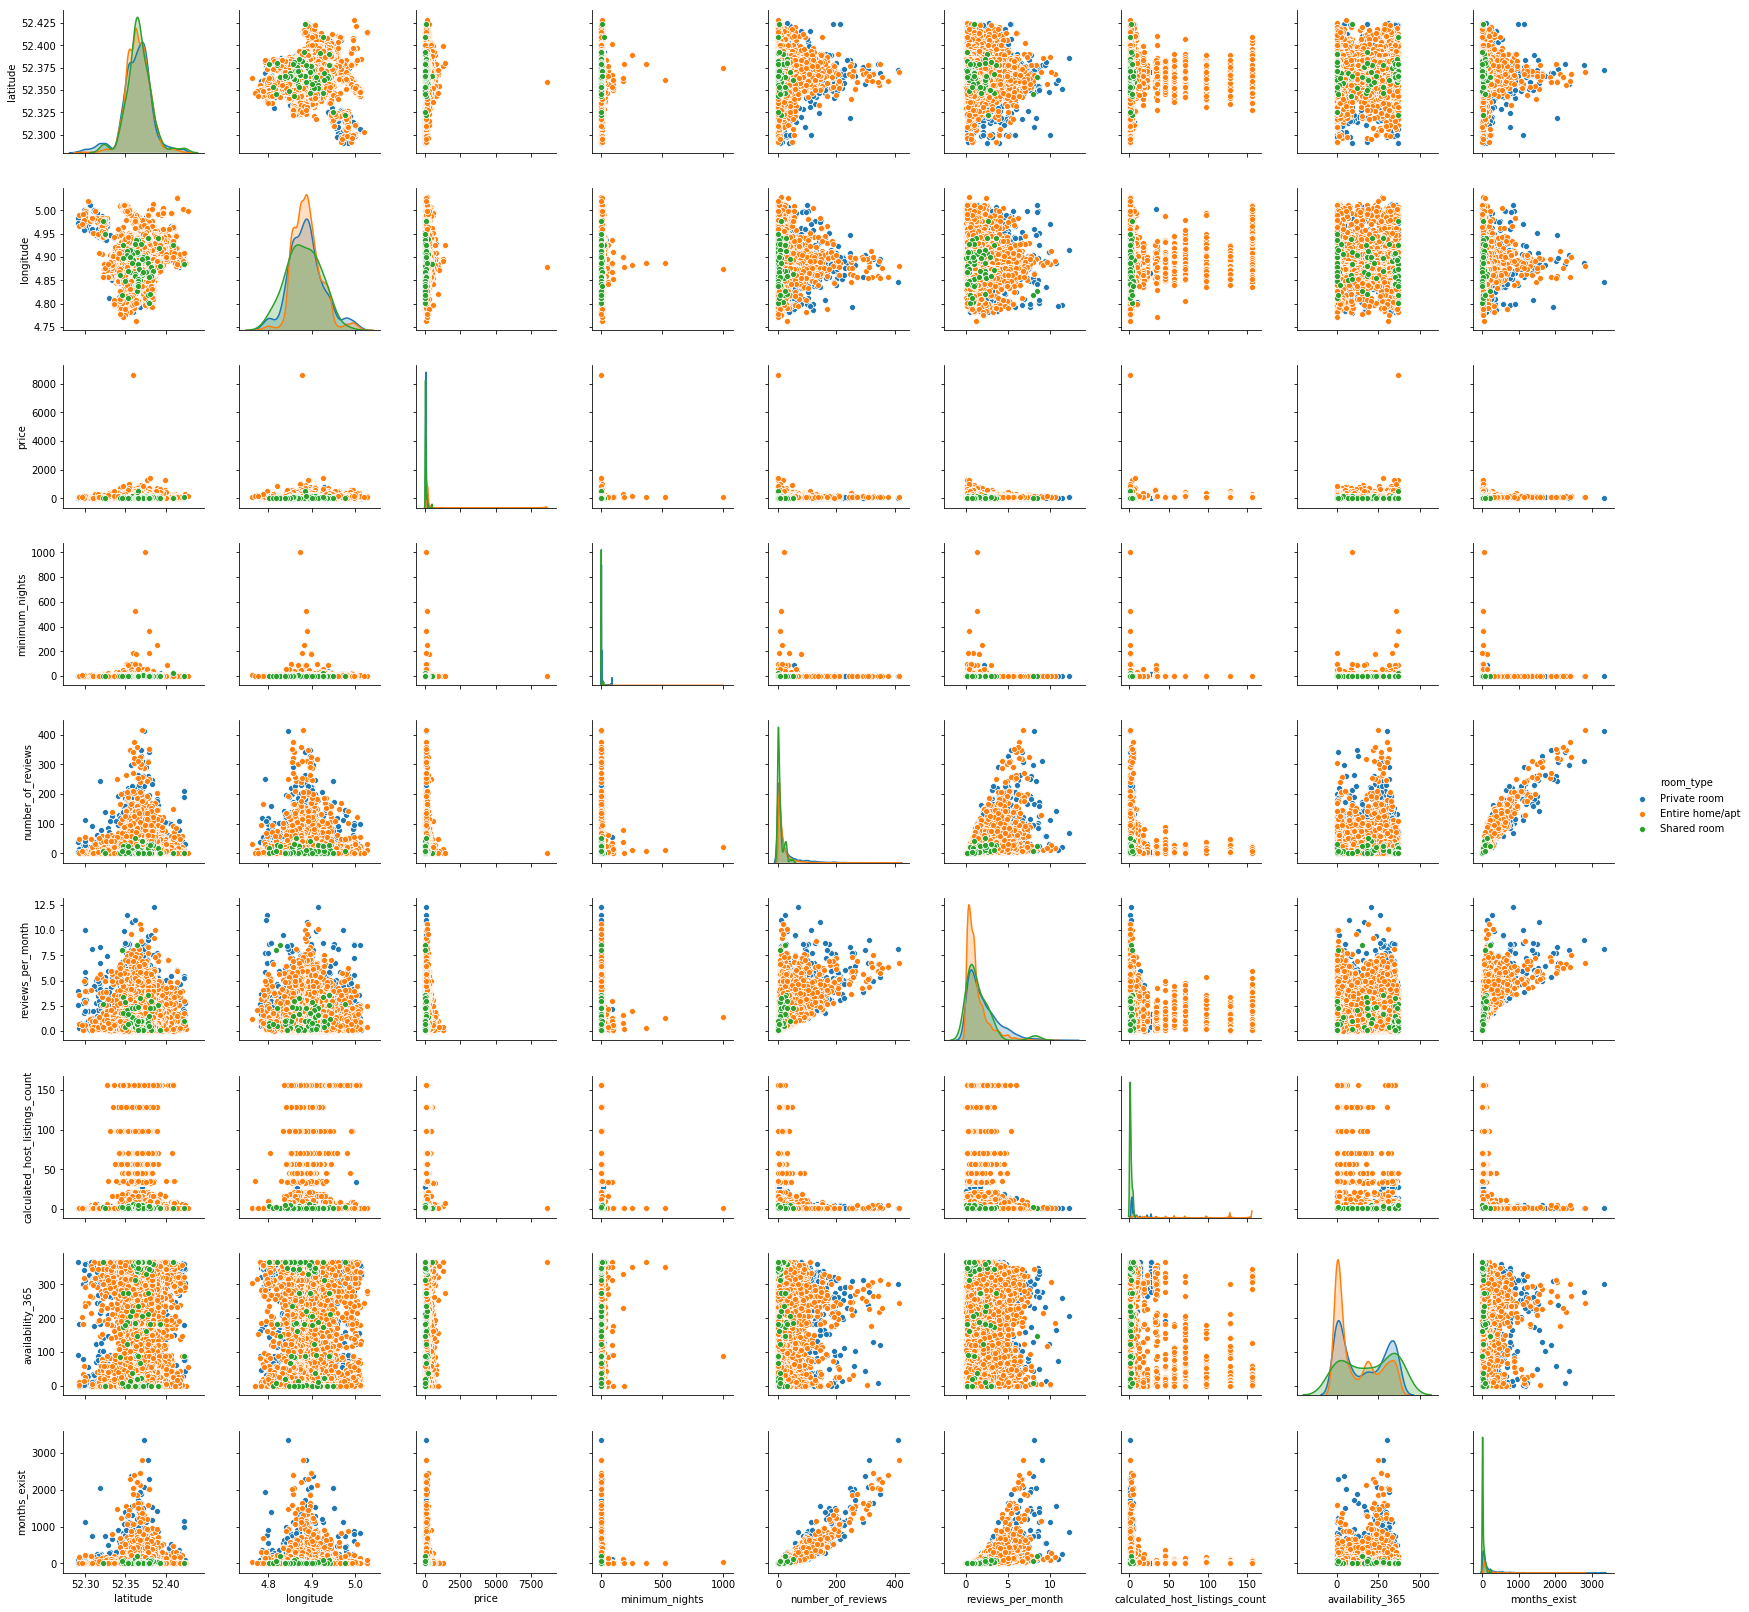

In [6]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue='room_type')


[(0, 400)]

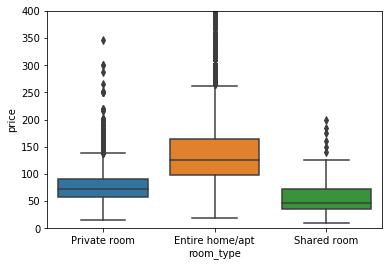

In [28]:
box=sns.boxplot(data=df, x='room_type', y='price')
box.set(ylim=(0, 400))

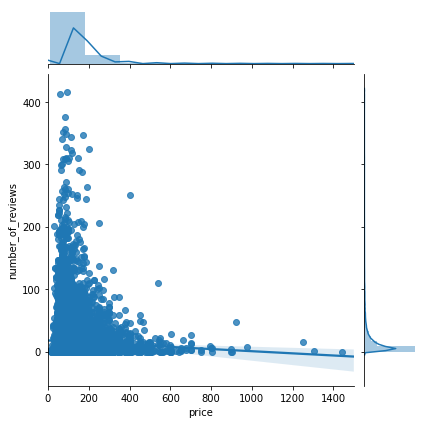

In [22]:
sns.jointplot(df.price, df.number_of_reviews, kind='reg', xlim=(0,1500))

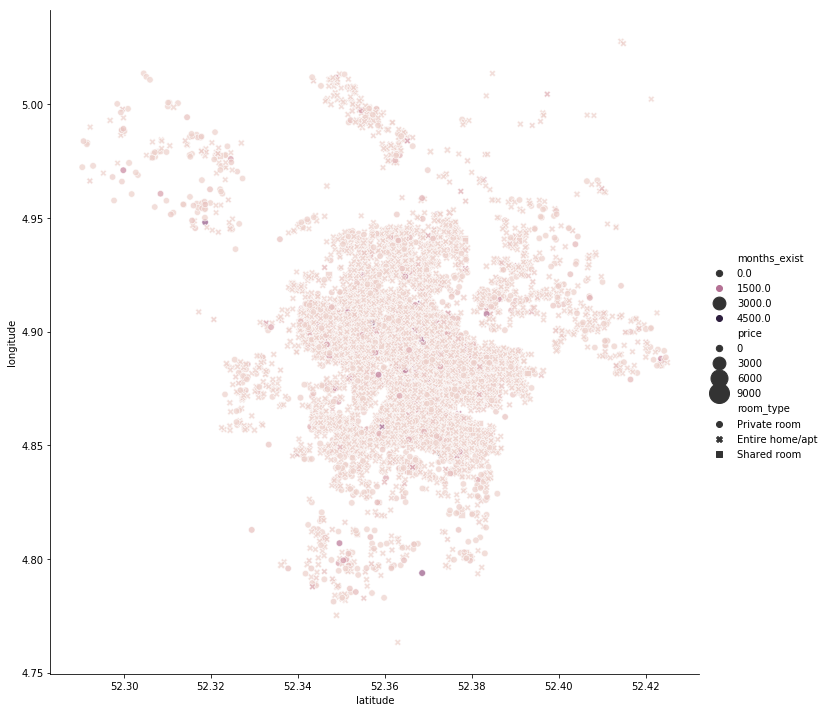

In [7]:
sns.relplot(x='latitude', y='longitude', style='room_type', size='price', hue='months_exist', alpha=0.7, data=df, sizes=(40, 400), height=10)

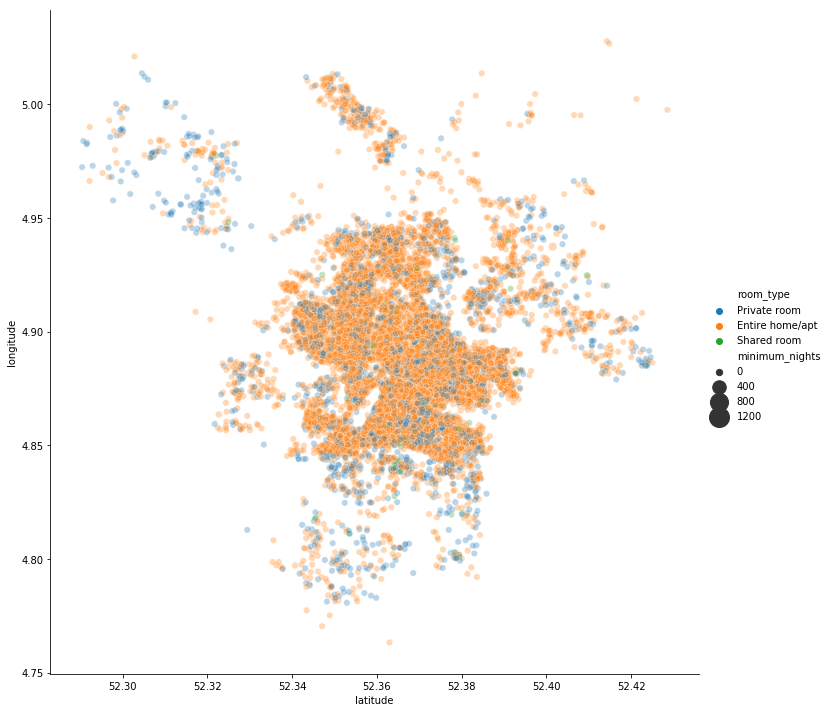

In [35]:
sns.relplot(x='latitude', y='longitude', hue='room_type', size='minimum_nights', alpha=0.3, data=df, sizes=(40, 400), height=10)